## Principal Component Analysis

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [133]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


In [134]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [136]:
# Create a DataFrame for visualization
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df['target'] = y


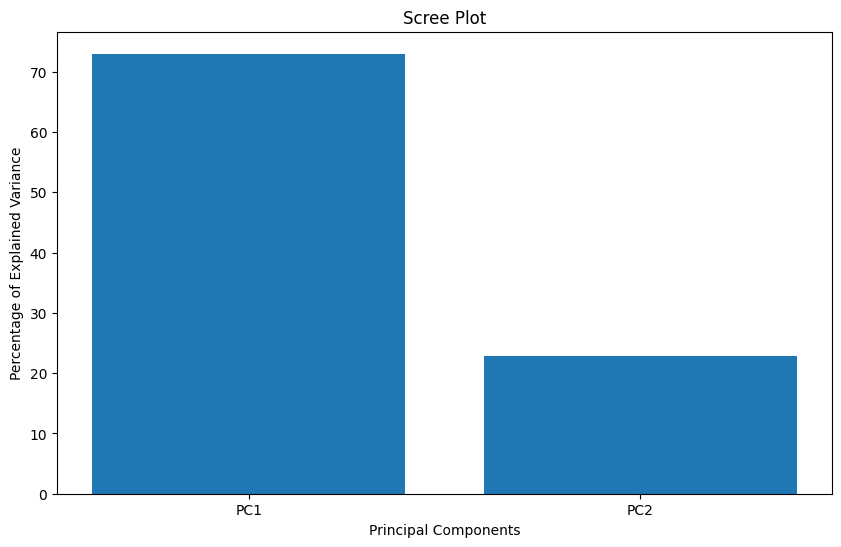

In [137]:

# Scree Plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')

plt.show()

## PCA without using sklearn library


In [138]:
import numpy as np

def mean_normalize(X):
    mean = np.mean(X, axis=0)
    normalized_X = X - mean
    return normalized_X, mean

def compute_covariance_matrix(X):
    m = X.shape[0]
    covariance_matrix = np.dot(X.T, X) / (m - 1)
    return covariance_matrix

def perform_pca(X, num_components):
    normalized_X, mean = mean_normalize(X)
    covariance_matrix = compute_covariance_matrix(normalized_X)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]
    
    # Project the data onto the principal components
    reduced_X = np.dot(normalized_X, principal_components)
    
    return reduced_X, eigenvalues, principal_components, mean

# Example usage
# Create a sample dataset with 3 features and 5 observations
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9],
                 [10, 11, 12],
                 [13, 14, 15]])

num_components = 2  # Number of principal components to keep
reduced_data, eigenvalues, principal_components, mean = perform_pca(data, num_components)

print("Reduced Data:\n", reduced_data)
print("Eigenvalues:\n", eigenvalues)
print("Principal Components:\n", principal_components)


Reduced Data:
 [[-1.03923048e+01  6.66133815e-16]
 [-5.19615242e+00  3.33066907e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.19615242e+00 -3.33066907e-16]
 [ 1.03923048e+01 -6.66133815e-16]]
Eigenvalues:
 [ 6.75000000e+01  5.11888017e-16 -3.65705749e-16]
Principal Components:
 [[ 0.57735027 -0.52707631]
 [ 0.57735027 -0.27650158]
 [ 0.57735027  0.8035779 ]]


In [139]:
import numpy as np
import pandas as pd

In [140]:
def mean_norm(X):
    m = X.shape[1]
    for i in range(m):
        mean = np.mean(X[i])
        normalized_X = X - mean
    return normalized_X, mean


# # def mean_normalize(X):
# #     mean = np.mean(X, axis=0)
# #     normalized_X = X - mean
# #     return normalized_X, mean
# normalized_X, mean = mean_norm(X)
# X.shape[1]
normalized_X, mean = mean_norm(X)
mean

2.3499999999999996

In [141]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def mean_normalize(X):
    mean = np.mean(X, axis=0)
    normalized_X = X - mean
    return normalized_X, mean

def compute_covariance_matrix(X):
    m = X.shape[0]
    covariance_matrix = np.dot(X.T, X) / (m - 1)
    return covariance_matrix

def perform_pca(X, num_components):
    normalized_X, mean = mean_normalize(X)
    covariance_matrix = compute_covariance_matrix(normalized_X)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]
    
    # Project the data onto the principal components
    reduced_X = np.dot(normalized_X, principal_components)
    
    return reduced_X, eigenvalues, principal_components, mean, eigenvectors

# Load the Iris dataset
iris = load_iris()
X = iris.data

num_components = 2  # Number of principal components to keep
reduced_data, eigenvalues, principal_components, mean,a = perform_pca(X, num_components)

# Plot the PCA results
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris.target)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Iris Dataset')
# plt.show()

# a,b = mean_normalize(X)

# reduced_X, eigenvalues, principal_components, mean = perform_pca(X, num_components)
# reduced_X
# eigenvalues
# print(reduced_data)

# print(eigenvalues)
# print(principal_components)
for i in range(10):
    a = []
    a.append(reduced_data[i][0])
a







[2.672755797820954]

In [142]:

# def compute_covariance_matrix(X):
#     m = X.shape[0]
#     covariance_matrix = np.dot(X.T, X) / (m - 1)
#     return covariance_matrix

# compute_covariance_matrix(X)